In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, month, to_date, col, count


In [0]:
# Cargando el archivo CSV en un DataFrame de Spark
df_cirugias = spark.read.csv("dbfs:/FileStore/tables/Listado_de_cirugias_de_alta_complejidad_realizadas_de_Enero_2022_Junio_2024__1_.csv", header=True, inferSchema=True)
df_cirugias.show()

+--------------------+----------------+---------+---------------+-----------------------+--------------------+-----------------------+--------------------+-----------+
|                UUID|        HISTORIA|     SEXO|FECHA_OPERACION|DES_HORA_INICIO_CIRUGIA|DES_HORA_FIN_CIRUGIA|UBIGEO_LUGAR_RESIDENCIA|    LUGAR_RESIDENCIA|FECHA_CORTE|
+--------------------+----------------+---------+---------------+-----------------------+--------------------+-----------------------+--------------------+-----------+
|B102CAED3BDCF95D2...|A29B1BDF4A0EB794|MASCULINO|       20220826|                 1300.0|                1655|                 150101|      LIMA-LIMA-LIMA|   20240717|
|8897F80867B93D90C...|774415C1CE0C24A0| FEMENINO|       20220117|                  840.0|                1015|                 150202| LIMA-BARRANCA-PA...|   20240717|
|E2AD7C98289035E2A...|4AF11C9ADE732FE2| FEMENINO|       20220117|                 1100.0|                1300|                  10113| AMAZONAS-CHACHAP...|   20

In [0]:
column_names = df_cirugias.columns
print(column_names)

['UUID', 'HISTORIA', 'SEXO', 'FECHA_OPERACION', 'DES_HORA_INICIO_CIRUGIA', 'DES_HORA_FIN_CIRUGIA', 'UBIGEO_LUGAR_RESIDENCIA', 'LUGAR_RESIDENCIA', 'FECHA_CORTE']


In [0]:
from pyspark.sql.functions import count

# Agrupar por sexo y contar el número de cirugías
cirugias_por_sexo = df_cirugias.groupBy("SEXO").agg(count("*").alias("NUM_CIRUGIAS"))

# Mostrar resultados
cirugias_por_sexo.show()

+---------+------------+
|     SEXO|NUM_CIRUGIAS|
+---------+------------+
| FEMENINO|        9546|
|MASCULINO|        5216|
+---------+------------+



+---------+------------+
|     SEXO|NUM_CIRUGIAS|
+---------+------------+
| FEMENINO|        9546|
|MASCULINO|        5216|
+---------+------------+



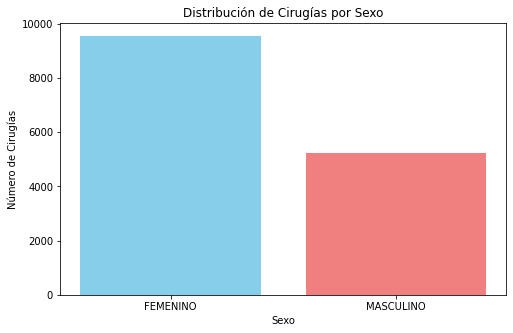

In [0]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt

# Agrupar por sexo y contar el número de cirugías
cirugias_por_sexo = df_cirugias.groupBy("SEXO").agg(count("*").alias("NUM_CIRUGIAS"))

# Mostrar resultados
cirugias_por_sexo.show()

# Recoger los resultados como un DataFrame de Pandas para facilitar la visualización
df_pandas = cirugias_por_sexo.toPandas()

# Graficar la distribución de cirugías por sexo
plt.figure(figsize=(8, 5)) #ancho,alto
plt.bar(df_pandas['SEXO'], df_pandas['NUM_CIRUGIAS'], color=['skyblue', 'lightcoral'])
plt.title('Distribución de Cirugías por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Cirugías')
plt.xticks(rotation=0)
plt.show()

In [0]:
# Mostrar algunos valores únicos de la columna LUGAR_RESIDENCIA
df_cirugias.select("LUGAR_RESIDENCIA").distinct().show(10, truncate=False)

+---------------------------------------+
|LUGAR_RESIDENCIA                       |
+---------------------------------------+
| LIMA-LIMA-LIMA                        |
| LIMA-LIMA-SAN JUAN DE MIRAFLORES      |
| LIMA-LIMA-SAN JUAN DE LURIGANCHO      |
| LIMA-LIMA-EL AGUSTINO                 |
| LIMA-LIMA-BRENA                       |
| LIMA-LIMA-COMAS                       |
| CALLAO     (PRO-CALLAO-CALLAO         |
| CAJAMARCA-CHOTA-LAJAS                 |
| AMAZONAS-CHACHAPOYAS-MARISCAL CASTILLA|
| ICA-PISCO-TUPAC AMARU INCA            |
+---------------------------------------+
only showing top 10 rows



In [0]:
from pyspark.sql.functions import count

# Contar el número de cirugías por lugar de residencia
cirugias_por_residencia = df_cirugias.groupBy("LUGAR_RESIDENCIA").agg(count("*").alias("NUM_CIRUGIAS"))

# Mostrar los lugares con más cirugías
cirugias_por_residencia.orderBy("NUM_CIRUGIAS", ascending=False).show(10)

+--------------------+------------+
|    LUGAR_RESIDENCIA|NUM_CIRUGIAS|
+--------------------+------------+
| LIMA-LIMA-SAN JU...|         877|
| LIMA-LIMA-SAN MA...|         501|
|     LIMA-LIMA-COMAS|         464|
|      LIMA-LIMA-LIMA|         460|
|       LIMA-LIMA-ATE|         413|
| LIMA-LIMA-SAN JU...|         406|
| LIMA-LIMA-VILLA ...|         386|
| LIMA-LIMA-VILLA ...|         363|
| LIMA-LIMA-LOS OL...|         308|
| CALLAO     (PRO-...|         288|
+--------------------+------------+
only showing top 10 rows



<Figure size 864x432 with 0 Axes>

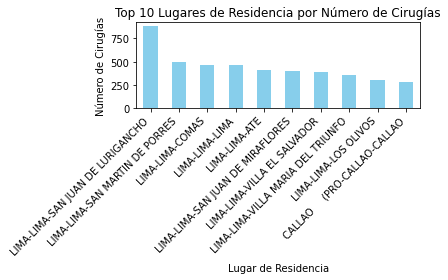

In [0]:
import matplotlib.pyplot as plt

# Convertir a Pandas para visualización
df_residencia_pandas = cirugias_por_residencia.toPandas()

# Graficar la distribución de cirugías por lugar de residencia
plt.figure(figsize=(12, 6))
df_residencia_pandas.sort_values(by="NUM_CIRUGIAS", ascending=False).head(10).plot(
    kind='bar', x='LUGAR_RESIDENCIA', y='NUM_CIRUGIAS', legend=False, color='skyblue'
)
plt.title('Top 10 Lugares de Residencia por Número de Cirugías')
plt.xlabel('Lugar de Residencia')
plt.ylabel('Número de Cirugías')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [0]:
from pyspark.sql.functions import rand, floor, col

In [0]:
# Generar una columna de edades aleatorias entre 18 y 80, ya que no contamos con información de la edad de los pacientes
df_cirugias = df_cirugias.withColumn("EDAD", floor(rand() * (80 - 18 + 1) + 18))

# Mostrar algunas filas para verificar la columna de edad
df_cirugias.select("EDAD").show(10)

+----+
|EDAD|
+----+
|  49|
|  18|
|  58|
|  35|
|  20|
|  33|
|  65|
|  49|
|  26|
|  64|
+----+
only showing top 10 rows



In [0]:
# Verificar las edades generadas
df_cirugias.select("EDAD").describe().show()

+-------+-----------------+
|summary|             EDAD|
+-------+-----------------+
|  count|            14762|
|   mean|49.14042812627015|
| stddev|18.11357908698821|
|    min|               18|
|    max|               80|
+-------+-----------------+



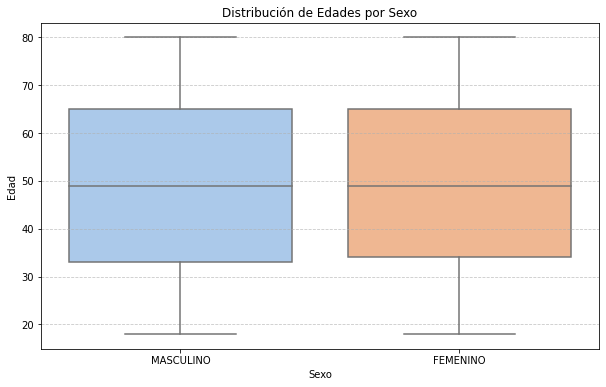

In [0]:
import seaborn as sns
# Convertir a Pandas para visualización
df_pandas = df_cirugias.select("EDAD", "SEXO").toPandas()

# Graficar distribución de edades por sexo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pandas, x='SEXO', y='EDAD', palette='pastel')
plt.title('Distribución de Edades por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [0]:
from pyspark.sql.functions import when

In [0]:
# Cambiar los valores de MASCULINO a M y FEMENINO a F
df_cirugias = df_cirugias.withColumn(
    "SEXO",
    when(df_cirugias["SEXO"] == "MASCULINO", "M")
    .when(df_cirugias["SEXO"] == "FEMENINO", "F")
    .otherwise(df_cirugias["SEXO"])  # Dejar otros valores como están, si existen
)

# Mostrar algunas filas para verificar el cambio
df_cirugias.select("SEXO").distinct().show()

+----+
|SEXO|
+----+
|   F|
|   M|
+----+



In [0]:
# Convertir el DataFrame de Spark a Pandas
df_pandas = df_cirugias.select("SEXO", "LUGAR_RESIDENCIA").toPandas()

In [0]:
# Contar el número de registros por lugar de residencia
top_lugares = df_pandas['LUGAR_RESIDENCIA'].value_counts().nlargest(10).index

# Filtrar el DataFrame para que solo incluya los lugares de residencia más comunes
df_top_lugares = df_pandas[df_pandas['LUGAR_RESIDENCIA'].isin(top_lugares)]

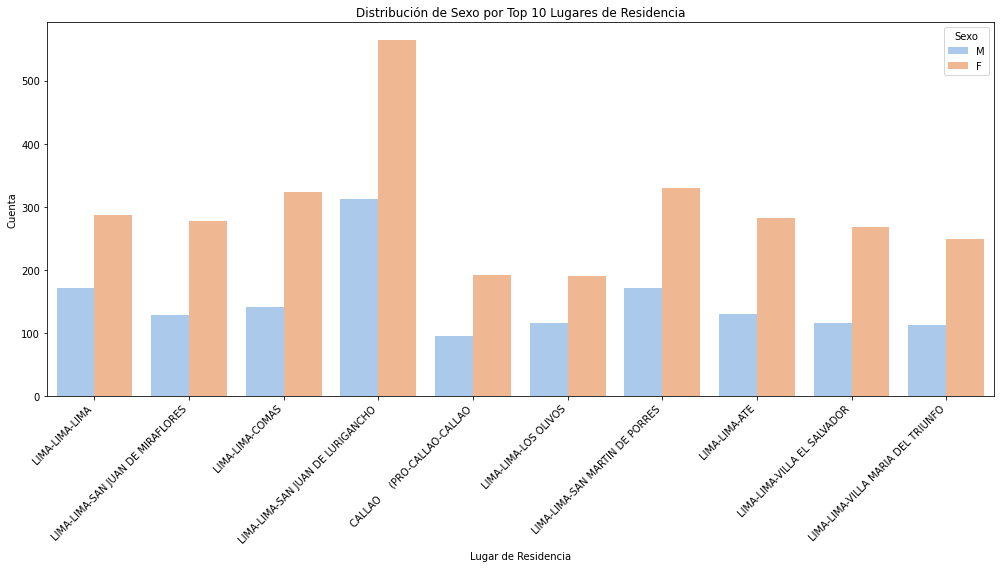

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 8))

# Crear un gráfico de conteo para los top 10 lugares de residencia
sns.countplot(data=df_top_lugares, x='LUGAR_RESIDENCIA', hue='SEXO', palette='pastel')

# Configurar el gráfico
plt.title('Distribución de Sexo por Top 10 Lugares de Residencia')
plt.xlabel('Lugar de Residencia')
plt.ylabel('Cuenta')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

In [0]:
df_cirugias.select("FECHA_OPERACION").show(5, truncate=False)

+---------------+
|FECHA_OPERACION|
+---------------+
|20220826       |
|20220117       |
|20220117       |
|20220117       |
|20220117       |
+---------------+
only showing top 5 rows



In [0]:
# Contar cuántos valores nulos hay en la columna
df_cirugias.filter(col("FECHA_CORTE").isNull()).count()

Out[26]: 0

In [0]:
from pyspark.sql.functions import to_date

# Convertir la columna FECHA_OPERACION a un formato de fecha válido
df_cirugias = df_cirugias.withColumn("FECHA_OPERACION_VALIDA", to_date(df_cirugias["FECHA_OPERACION"], "yyyyMMdd"))

# Mostrar las primeras filas para verificar la conversión
df_cirugias.select("FECHA_OPERACION", "FECHA_OPERACION_VALIDA").show(5, truncate=False)

+---------------+----------------------+
|FECHA_OPERACION|FECHA_OPERACION_VALIDA|
+---------------+----------------------+
|20220826       |2022-08-26            |
|20220117       |2022-01-17            |
|20220117       |2022-01-17            |
|20220117       |2022-01-17            |
|20220117       |2022-01-17            |
+---------------+----------------------+
only showing top 5 rows



In [0]:
# Extraer el año de la columna FECHA_OPERACION_VALIDA
df_cirugias = df_cirugias.withColumn("ANIO_OPERACION", year("FECHA_OPERACION_VALIDA"))

# Mostrar las primeras filas para verificar
df_cirugias.select("FECHA_OPERACION_VALIDA", "ANIO_OPERACION").show(5)

+----------------------+--------------+
|FECHA_OPERACION_VALIDA|ANIO_OPERACION|
+----------------------+--------------+
|            2022-08-26|          2022|
|            2022-01-17|          2022|
|            2022-01-17|          2022|
|            2022-01-17|          2022|
|            2022-01-17|          2022|
+----------------------+--------------+
only showing top 5 rows



In [0]:
# Agrupar por año y contar las operaciones
df_operaciones_por_anio = df_cirugias.groupBy("ANIO_OPERACION").count()

# Mostrar el resultado
df_operaciones_por_anio.show()

+--------------+-----+
|ANIO_OPERACION|count|
+--------------+-----+
|          2023| 6379|
|          2022| 5158|
|          2024| 3225|
+--------------+-----+



In [0]:
# Convertir a Pandas DataFrame para la visualización
pdf_operaciones_por_anio = df_operaciones_por_anio.toPandas()

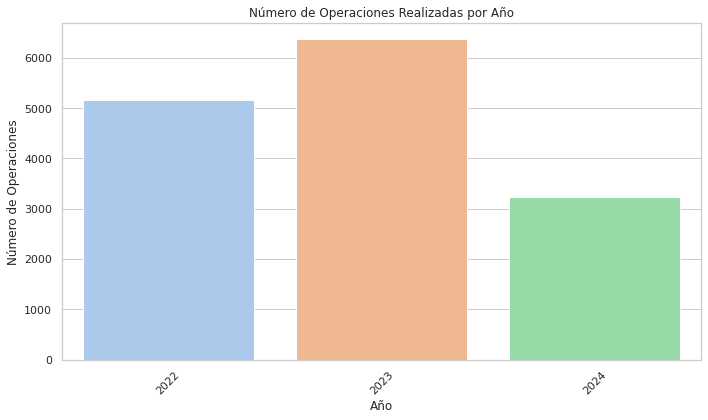

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x="ANIO_OPERACION", y="count", data=pdf_operaciones_por_anio, palette="pastel")

# Configurar el gráfico
plt.title("Número de Operaciones Realizadas por Año")
plt.xlabel("Año")
plt.ylabel("Número de Operaciones")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [0]:
# Filtrar las operaciones del año 2023
df_2023 = df_cirugias.filter(df_cirugias["ANIO_OPERACION"] == 2023)

from pyspark.sql.functions import month

# Extraer el mes de la columna FECHA_OPERACION_VALIDA
df_2023 = df_2023.withColumn("MES_OPERACION", month("FECHA_OPERACION_VALIDA"))

# Mostrar las primeras filas para verificar
df_2023.select("FECHA_OPERACION_VALIDA", "MES_OPERACION").show(5)

+----------------------+-------------+
|FECHA_OPERACION_VALIDA|MES_OPERACION|
+----------------------+-------------+
|            2023-01-06|            1|
|            2023-01-06|            1|
|            2023-01-06|            1|
|            2023-01-04|            1|
|            2023-01-04|            1|
+----------------------+-------------+
only showing top 5 rows



In [0]:
# Agrupar por mes y contar las operaciones en 2023
df_operaciones_por_mes_2023 = df_2023.groupBy("MES_OPERACION").count()

# Mostrar el resultado
df_operaciones_por_mes_2023.show()

+-------------+-----+
|MES_OPERACION|count|
+-------------+-----+
|           12|  463|
|            1|  553|
|            6|  573|
|            3|  593|
|            5|  581|
|            9|  548|
|            4|  499|
|            8|  539|
|            7|  492|
|           10|  544|
|           11|  479|
|            2|  515|
+-------------+-----+



In [0]:
# Convertir a Pandas DataFrame para la visualización
pdf_operaciones_por_mes_2023 = df_operaciones_por_mes_2023.toPandas()

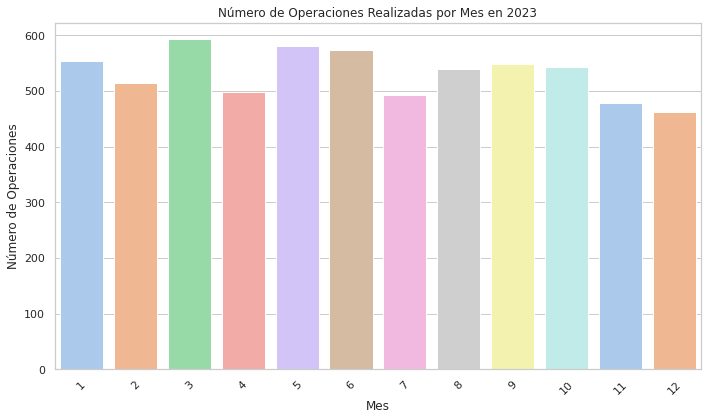

In [0]:
# Crear el gráfico de barras para operaciones por mes en 2023
plt.figure(figsize=(10, 6))
sns.barplot(x="MES_OPERACION", y="count", data=pdf_operaciones_por_mes_2023, palette="pastel")

# Configurar el gráfico
plt.title("Número de Operaciones Realizadas por Mes en 2023")
plt.xlabel("Mes")
plt.ylabel("Número de Operaciones")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

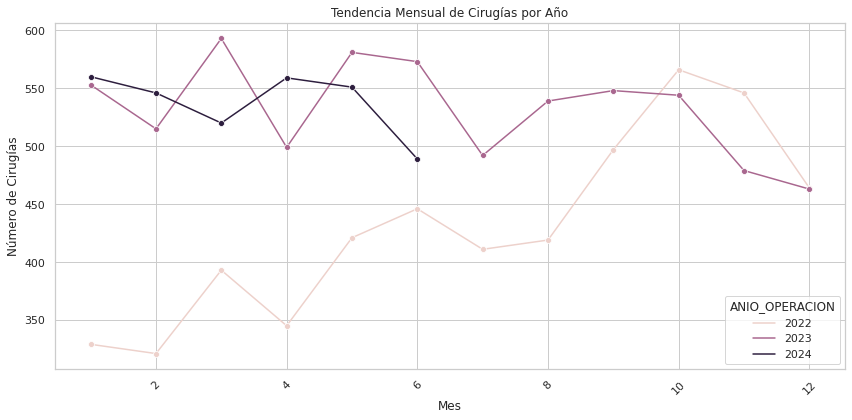

In [0]:
from pyspark.sql.functions import month

# Extraer el mes y año
df_cirugias = df_cirugias.withColumn("MES_OPERACION", month("FECHA_OPERACION_VALIDA"))

# Agrupar por año y mes
df_trend = df_cirugias.groupBy("ANIO_OPERACION", "MES_OPERACION").count()

# Convertir a Pandas para visualización
pdf_trend = df_trend.toPandas()

# Crear gráfico de líneas - Análisis de tendencia mensual por año
plt.figure(figsize=(12, 6))
sns.lineplot(data=pdf_trend, x="MES_OPERACION", y="count", hue="ANIO_OPERACION", marker="o")
plt.title("Tendencia Mensual de Cirugías por Año")
plt.xlabel("Mes")
plt.ylabel("Número de Cirugías")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
from pyspark.sql.functions import col, lpad

# Agregar un 0 al inicio de cada valor en la columna DES_HORA_INICIO_CIRUGIA para corregir formato a uno correcto
df_cirugias = df_cirugias.withColumn(
    "DES_HORA_INICIO_CIRUGIA",
    lpad(col("DES_HORA_INICIO_CIRUGIA"), 6, "0")
)

# Mostrar los resultados
df_cirugias.select("DES_HORA_INICIO_CIRUGIA").show(10)

+-----------------------+
|DES_HORA_INICIO_CIRUGIA|
+-----------------------+
|                 1300.0|
|                 0840.0|
|                 1100.0|
|                 1400.0|
|                 0830.0|
|                 1115.0|
|                 1245.0|
|                 1245.0|
|                 0835.0|
|                 0900.0|
+-----------------------+
only showing top 10 rows



In [0]:
from pyspark.sql.functions import substring, concat, lit

# Extraer horas y minutos y convertirlos a formato HH:mm
df_cirugias = df_cirugias.withColumn("HORA", substring("DES_HORA_INICIO_CIRUGIA", 1, 2))
df_cirugias = df_cirugias.withColumn("MINUTO", substring("DES_HORA_INICIO_CIRUGIA", 3, 2))

# Concatenar horas y minutos en formato HH:mm
df_cirugias = df_cirugias.withColumn(
    "HORA_INICIO_CIRUGIA",
    concat(col("HORA"), lit(":"), col("MINUTO"))
)

# Mostrar los resultados
df_cirugias.select("DES_HORA_INICIO_CIRUGIA", "HORA_INICIO_CIRUGIA").show(10)

+-----------------------+-------------------+
|DES_HORA_INICIO_CIRUGIA|HORA_INICIO_CIRUGIA|
+-----------------------+-------------------+
|                 1300.0|              13:00|
|                 0840.0|              08:40|
|                 1100.0|              11:00|
|                 1400.0|              14:00|
|                 0830.0|              08:30|
|                 1115.0|              11:15|
|                 1245.0|              12:45|
|                 1245.0|              12:45|
|                 0835.0|              08:35|
|                 0900.0|              09:00|
+-----------------------+-------------------+
only showing top 10 rows



In [0]:
from pyspark.sql.functions import substring, concat, lit

# Extraer horas y minutos y convertirlos a formato HH:mm
df_cirugias = df_cirugias.withColumn("HORA", substring("DES_HORA_FIN_CIRUGIA", 1, 2))
df_cirugias = df_cirugias.withColumn("MINUTO", substring("DES_HORA_FIN_CIRUGIA", 3, 2))

# Concatenar horas y minutos en formato HH:mm
df_cirugias = df_cirugias.withColumn(
    "HORA_FIN_CIRUGIA",
    concat(col("HORA"), lit(":"), col("MINUTO"))
)

# Mostrar los resultados
df_cirugias.select("DES_HORA_FIN_CIRUGIA", "HORA_FIN_CIRUGIA").show(10)

+--------------------+----------------+
|DES_HORA_FIN_CIRUGIA|HORA_FIN_CIRUGIA|
+--------------------+----------------+
|                1655|           16:55|
|                1015|           10:15|
|                1300|           13:00|
|                1530|           15:30|
|                1150|           11:50|
|                1235|           12:35|
|                1455|           14:55|
|                1455|           14:55|
|                1030|           10:30|
|                1155|           11:55|
+--------------------+----------------+
only showing top 10 rows



In [0]:
# Mostrar los resultados
df_cirugias.select("HORA_INICIO_CIRUGIA", "HORA_FIN_CIRUGIA").show(10)

+-------------------+----------------+
|HORA_INICIO_CIRUGIA|HORA_FIN_CIRUGIA|
+-------------------+----------------+
|              13:00|           16:55|
|              08:40|           10:15|
|              11:00|           13:00|
|              14:00|           15:30|
|              08:30|           11:50|
|              11:15|           12:35|
|              12:45|           14:55|
|              12:45|           14:55|
|              08:35|           10:30|
|              09:00|           11:55|
+-------------------+----------------+
only showing top 10 rows



In [0]:
from pyspark.sql.functions import col, unix_timestamp, round

# Supongamos que las columnas están en formato HH:mm

# Convertir las columnas de tiempo en formato HH:mm a segundos desde el inicio del día
df_cirugias = df_cirugias.withColumn(
    "HORA_INICIO_SEC",
    unix_timestamp(col("HORA_INICIO_CIRUGIA"), "HH:mm") / 60
)

df_cirugias = df_cirugias.withColumn(
    "HORA_FIN_SEC",
    unix_timestamp(col("HORA_FIN_CIRUGIA"), "HH:mm") / 60
)

# Calcular la duración en minutos y convierte a horas
df_cirugias = df_cirugias.withColumn(
    "DURACION_HORAS",
    (col("HORA_FIN_SEC") - col("HORA_INICIO_SEC")) / 60
)

# Redondear la duración en horas a un número entero
df_cirugias = df_cirugias.withColumn(
    "DURACION_HORAS_ENT",
    round(col("DURACION_HORAS"))
)

# Mostrar los resultados
df_cirugias.select("HORA_INICIO_CIRUGIA", "HORA_FIN_CIRUGIA","DURACION_HORAS", "DURACION_HORAS_ENT").show(10)

+-------------------+----------------+------------------+------------------+
|HORA_INICIO_CIRUGIA|HORA_FIN_CIRUGIA|    DURACION_HORAS|DURACION_HORAS_ENT|
+-------------------+----------------+------------------+------------------+
|              13:00|           16:55|3.9166666666666665|               4.0|
|              08:40|           10:15|1.5833333333333333|               2.0|
|              11:00|           13:00|               2.0|               2.0|
|              14:00|           15:30|               1.5|               2.0|
|              08:30|           11:50|3.3333333333333335|               3.0|
|              11:15|           12:35|1.3333333333333333|               1.0|
|              12:45|           14:55|2.1666666666666665|               2.0|
|              12:45|           14:55|2.1666666666666665|               2.0|
|              08:35|           10:30|1.9166666666666667|               2.0|
|              09:00|           11:55|2.9166666666666665|               3.0|

In [0]:
# Filtrar las filas donde la duración sea menor que 0
df_cirugias_filtrado = df_cirugias.filter(df_cirugias["DURACION_HORAS_ENT"] < 0)

# Mostrar los primeros registros para verificar
df_cirugias_filtrado.select("FECHA_OPERACION_VALIDA", "DURACION_HORAS_ENT").show()


+----------------------+------------------+
|FECHA_OPERACION_VALIDA|DURACION_HORAS_ENT|
+----------------------+------------------+
|            2022-01-25|              -5.0|
|            2022-01-13|             -21.0|
|            2022-01-22|             -22.0|
|            2022-08-28|             -21.0|
|            2022-07-26|              -1.0|
|            2022-05-03|             -20.0|
|            2022-05-03|             -22.0|
|            2022-10-05|              -5.0|
|            2022-03-01|              -4.0|
|            2022-04-11|              -1.0|
|            2022-05-07|             -19.0|
|            2022-02-11|             -22.0|
|            2022-03-21|              -3.0|
|            2022-09-06|             -15.0|
|            2022-07-11|             -20.0|
|            2022-07-02|             -20.0|
|            2022-09-06|             -15.0|
|            2022-02-10|             -23.0|
|            2022-05-07|             -10.0|
|            2022-08-03|        

In [0]:
# Al validar que hay valores negativos en la duración de la operación, se procederá a filtrar las filas donde la duración sea mayor que 0
df_cirugias_filtrado = df_cirugias.filter(df_cirugias["DURACION_HORAS_ENT"] > 0)

# Mostrar los primeros registros para verificar
df_cirugias_filtrado.select("FECHA_OPERACION_VALIDA", "DURACION_HORAS_ENT").show(10)

+----------------------+------------------+
|FECHA_OPERACION_VALIDA|DURACION_HORAS_ENT|
+----------------------+------------------+
|            2022-08-26|               4.0|
|            2022-01-17|               2.0|
|            2022-01-17|               2.0|
|            2022-01-17|               2.0|
|            2022-01-17|               3.0|
|            2022-01-17|               1.0|
|            2022-01-17|               2.0|
|            2022-01-17|               2.0|
|            2022-01-17|               2.0|
|            2022-02-01|               3.0|
+----------------------+------------------+
only showing top 10 rows



In [0]:
# Verificar que no haya valores menores o iguales a 0
print(pdf_cirugias_filtrado["DURACION_HORAS_ENT"].min())

1.0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir a Pandas
pdf_cirugias_filtrado = df_cirugias_filtrado.toPandas()

# Agrupar por duración para contar cuántas cirugías caen en cada duración
df_grouped = pdf_cirugias_filtrado.groupby('DURACION_HORAS_ENT').size().reset_index(name='COUNT')

# Mostrar los primeros registros agrupados
df_grouped.head()

,DURACION_HORAS_ENT,COUNT
0,1.0,2531
1,2.0,4133
2,3.0,2907
3,4.0,1700
4,5.0,1212


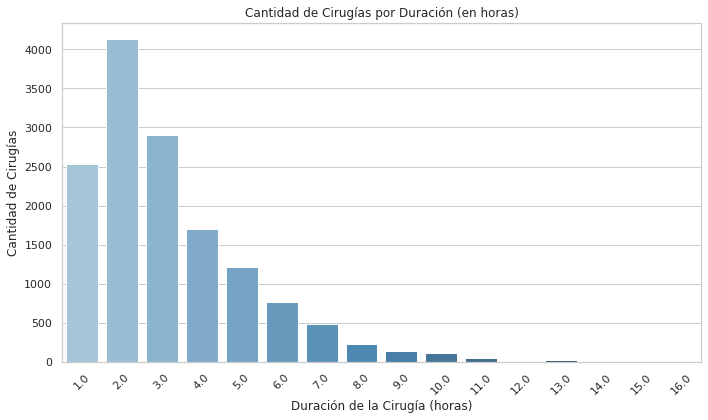

In [0]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='DURACION_HORAS_ENT', y='COUNT', data=df_grouped, palette="Blues_d")

# Añadir títulos y etiquetas
plt.title('Cantidad de Cirugías por Duración (en horas)')
plt.xlabel('Duración de la Cirugía (horas)')
plt.ylabel('Cantidad de Cirugías')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()